In [3]:
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import csv
import pandas as pd
from tqdm import tnrange, tqdm
from datetime import datetime
import xlwt
from xlwt import Workbook

class Ising():
    ''' Simulating the Ising model '''    
    ## monte carlo moves
    def mcmove(self, config, N, beta, h):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(1, N-1)
                    b = np.random.randint(0, N)
                    if a == len(config) :
                        s =  config[a, b]
                        nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N] - h 
                        cost = 2*s*nb
                    elif a == 0:
                        s =  config[a, b]
                        nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N] + h 
                        cost = 2*s*nb
                    else :
                        s =  config[a, b]
                        nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                        cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-1*cost*beta):
                        s *= -1
                    else:
                        s *= 1
                    config[a, b] = s
        return config  
    
    def configPlot(self, f, config, i, N, n_):
        ''' This modules plts the configuration once passed to it along with time etc '''
        X, Y = np.meshgrid(range(N), range(N+1))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

    def calcEnergy(self, config, h):
        '''Energy of a given configuration'''
        N = len(config)
        energy = 0
        for i in range(len(config)):
            for j in range(len(config)):
                if i == len(config):
                    S = config[i,j]
                    nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N] + h
                    energy += -nb*S
                elif i == 0:
                    S = config[i,j]
                    nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N] - h
                    energy += -nb*S
                else :
                    S = config[i,j]
                    nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N] 
                    energy += -nb*S
        return energy/4.


    def calcMag(self, config):
        '''Magnetization of a given configuration'''
        mag = np.sum(config)
        return mag
    
    def Interaction(self, a, b):
        count=0
        for i in range(len(a)):
            count += a[i]*b[i]
        return (-1*count)

    def simulate(self):   
        
        ''' This module simulates the Ising model'''
        
        N = 108       # Number of Rows
        h = 0        #external field
        N_intermediate_points = 1       #  number of temperature points
        T_min = 1.40                         #  lower range for temperature
        T_max = 2.10                         #  upper range for temperature
        T = np.linspace(T_min, T_max, N_intermediate_points);      #divisions T min and T max into different temperature steps 
        bin_histogram = np.linspace(-1*(N*N), (N*N), 8192)
        msrmnt = 100001
        sim_step = []
        
        
        config = 2*np.random.rand(N,N)-1
        
        for i in range(N):
            for j in range(N):
                if config[i][j] >= 0:
                    config[i][j] = 1.0
                else:
                    config[i][j] = 1.0
        
        for i in range(N):
            if (0<=i<=8) or (18<=i<=26) or (54<=i<=62) or (72<=i<=80):
                    config[0,i] = -0.1
                    config[N-1,i] = -0.1
            else:
                    config[0,i] = 0.1
                    config[N-1,i] = 0.1     
        f = plt.figure(figsize=(15, 15), dpi=80);
  
        #self.configPlot(f, config, 0, N, 1);
        
        
        
        
        for l in range(len(T)):
            
            wb1 = Workbook()

            sheet1 = wb1.add_sheet('Spins 2nd last row')
            sheet2 = wb1.add_sheet('Spins 2nd row')           
            sheet3 = wb1.add_sheet('Hamiltonian')
            sheet4 = wb1.add_sheet('Magnetization')
            sheet5 = wb1.add_sheet('Interaction Energy Top')
            sheet6 = wb1.add_sheet('Interaction Energy Bottom')
            

            #f = plt.figure(figsize=(15, 10)); # plot the calculated values    
    

            for i in range(msrmnt):
                if i == 0:       self.configPlot(f, config, i, N, 1);
                self.mcmove(config, N, 1.0/1.40, h)
                
                if i%100 == 0:
                    for j in range(N):
                        sheet1.write(int((i/100)+1), j+1, str(config[N-2,j]))
                        sheet2.write(int((i/100)+1), j+1, str(config[1,j]))
                        sheet3.write(int((i/100)+1), j+1, str(self.calcEnergy(config, h)))
                        sheet4.write(int((i/100)+1), j+1, str(self.calcMag(config)))
                        sheet5.write(int((i/100)+1), j+1, str(config[N-2,j]*config[N-1,j]))
                        sheet6.write(int((i/100)+1), j+1, str(config[0,j]*config[1,j]))
                        
                if i == 1:       self.configPlot(f, config, i, N, 2);
                if i == 4:       self.configPlot(f, config, i, N, 3);
                if i == 32:       self.configPlot(f, config, i, N, 4);
                if i == 1000:      self.configPlot(f, config, i, N, 5);
                if i == 10000:     self.configPlot(f, config, i, N, 6);
                if i == 20000:     self.configPlot(f, config, i, N, 7);
                if i == 50000:     self.configPlot(f, config, i, N, 8);
                if i == 100000:     self.configPlot(f, config, i, N, 9);
                
            wb1.save("Cantor Set Level 2")
            
      

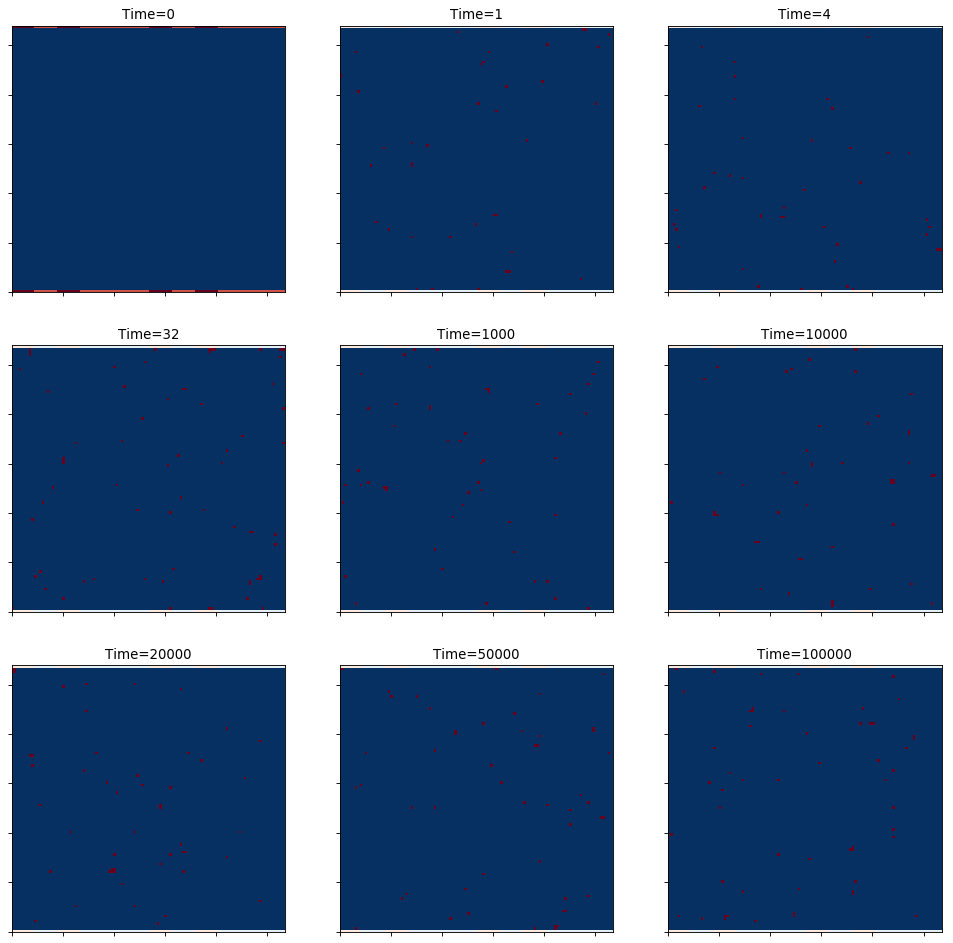

In [4]:
rm = Ising()
rm.simulate()